In [31]:
%matplotlib notebook

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
import os
import requests
import seaborn as sns
import datetime

file_to_load4 = "citibike data_Jan-Sep 2020.csv"
file_to_load1 = "Q1.csv"
file_to_load2 = "Q2.csv"
file_to_load3 = "Q3.csv"


newyork_data = pd.read_csv(file_to_load4)
q1 = pd.read_csv(file_to_load1)
q2 = pd.read_csv(file_to_load2)
q3 = pd.read_csv(file_to_load3)

In [32]:
newyork_data.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,226,1/0/1900 0:04,1/0/1900 0:08,3186,Grove St PATH,40.719586,-74.043117,3211,Newark Ave,40.721525,-74.046305,29444,Subscriber,1984,2
1,377,1/0/1900 0:16,1/0/1900 0:22,3186,Grove St PATH,40.719586,-74.043117,3269,Brunswick & 6th,40.726012,-74.050389,26305,Subscriber,1989,2
2,288,1/0/1900 0:17,1/0/1900 0:22,3186,Grove St PATH,40.719586,-74.043117,3269,Brunswick & 6th,40.726012,-74.050389,29268,Customer,1989,1
3,435,1/0/1900 0:32,1/0/1900 0:39,3195,Sip Ave,40.730897,-74.063913,3280,Astor Place,40.719282,-74.071262,29278,Customer,1969,0
4,231,1/0/1900 0:46,1/0/1900 0:50,3186,Grove St PATH,40.719586,-74.043117,3276,Marin Light Rail,40.714584,-74.042817,29276,Subscriber,1983,2


In [33]:
newyork_data.shape

(273747, 15)

In [34]:
newyork_data.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender'],
      dtype='object')

In [35]:
#Rename columns
newyork_data = newyork_data.rename(columns = {"tripduration":"Trip Duration", "starttime":"Start Time", 
                                              "stoptime":"Stop Time", "start station id":"Start Station ID", 
                                              "start station name":"Start Station Name", 
                                              "start station latitude":"Start Station Latitude", 
                                              "start station longitude":"Start Station Longitude", 
                                              "end station id":"End Station ID", 
                                              "end station name":"End Station Name", 
                                              "end station latitude":"End Station Latitute", 
                                              "end station longitude":"End Station Longitude", 
                                              "bikeid":"Bike ID", "usertype":"User Type", "birth year":"Birth Year", 
                                              "gender":"Gender"})
newyork_data.head()

,Trip Duration,Start Time,Stop Time,Start Station ID,Start Station Name,Start Station Latitude,Start Station Longitude,End Station ID,End Station Name,End Station Latitute,End Station Longitude,Bike ID,User Type,Birth Year,Gender
0,226,1/0/1900 0:04,1/0/1900 0:08,3186,Grove St PATH,40.719586,-74.043117,3211,Newark Ave,40.721525,-74.046305,29444,Subscriber,1984,2
1,377,1/0/1900 0:16,1/0/1900 0:22,3186,Grove St PATH,40.719586,-74.043117,3269,Brunswick & 6th,40.726012,-74.050389,26305,Subscriber,1989,2
2,288,1/0/1900 0:17,1/0/1900 0:22,3186,Grove St PATH,40.719586,-74.043117,3269,Brunswick & 6th,40.726012,-74.050389,29268,Customer,1989,1
3,435,1/0/1900 0:32,1/0/1900 0:39,3195,Sip Ave,40.730897,-74.063913,3280,Astor Place,40.719282,-74.071262,29278,Customer,1969,0
4,231,1/0/1900 0:46,1/0/1900 0:50,3186,Grove St PATH,40.719586,-74.043117,3276,Marin Light Rail,40.714584,-74.042817,29276,Subscriber,1983,2


In [36]:
newyork_data["Gender"].unique()

array([2, 1, 0])

In [37]:
count_gender = newyork_data["Gender"].value_counts()
count_gender


1    160558
2     69451
0     43738
Name: Gender, dtype: int64

In [38]:
count_gender = pd.DataFrame({"Gender":[160558, 69451, 43738]}, index = ["Male", "Female", "Unknown"])
count_gender

,Gender
Male,160558
Female,69451
Unknown,43738


In [39]:
# female_data = newyork_data.loc[newyork_data["Gender"] == 2,:]
# total_female_ride = female_data["Bike ID"].count()
# total_female_ride

In [40]:
count_gender_total = count_gender.sum()
count_gender_total

Gender    273747
dtype: int64

<IPython.core.display.Javascript object>


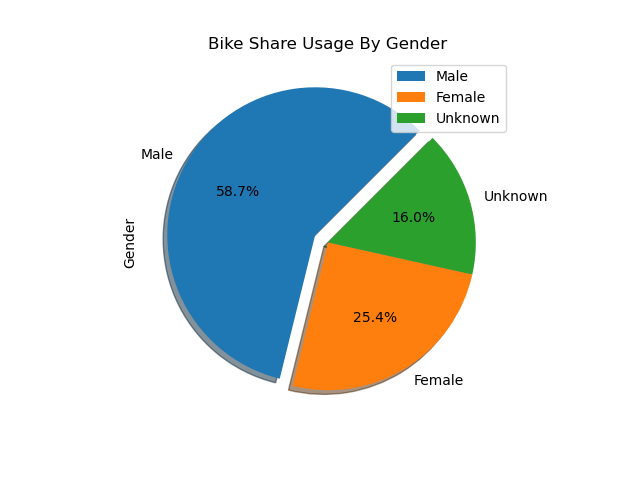

In [41]:
explode = (0.10, 0, 0)
pie1 = count_gender.plot(kind = "pie", y = "Gender", explode =explode, shadow= True, startangle= 45, autopct ="%1.1f%%")
plt.title("Bike Share Usage By Gender")
file = os.path.join("Images", "Bike Share Usage By Gender")
plt.savefig(file, bbox_inches= "tight")  
plt.legend(loc= "best")
plt.show()

grouped_gender = newyork_data.groupby("Gender")
count_age =grouped_gender["Bike ID"].count()
count_age

In [42]:
user_type = newyork_data.groupby(["User Type", "Gender"])
user_type_count =user_type["Trip Duration"].count()
user_type_count.to_frame()

Trip Duration
User Type  Gender               
Customer   0               41018
           1               26991
           2               20312
Subscriber 0                2720
           1              133567
           2               49139

In [43]:
# #Percentage of customers and subscribers by comparing trip number 
# explode = (0, 0, 0, 0.35, 0 , 0)

# pie2 = user_type_count.plot(kind = "pie", explode= explode, shadow= True, startangle= 45)
# plt.title("Customer vs Subscriber")
# file = os.path.join("Images", "Customer vs Subscriber")
# plt.savefig(file, bbox_inches= "tight")  
# plt.legend(loc = "best")
# plt.show()

In [44]:
user_type_data = newyork_data.groupby([ "Gender", "User Type"])
user_type_df = user_type_data["Trip Duration"].count()
df = user_type_df.to_frame()
df

Trip Duration
Gender User Type                
0      Customer            41018
       Subscriber           2720
1      Customer            26991
       Subscriber         133567
2      Customer            20312
       Subscriber          49139

In [45]:
newyork_data.head()

,Trip Duration,Start Time,Stop Time,Start Station ID,Start Station Name,Start Station Latitude,Start Station Longitude,End Station ID,End Station Name,End Station Latitute,End Station Longitude,Bike ID,User Type,Birth Year,Gender
0,226,1/0/1900 0:04,1/0/1900 0:08,3186,Grove St PATH,40.719586,-74.043117,3211,Newark Ave,40.721525,-74.046305,29444,Subscriber,1984,2
1,377,1/0/1900 0:16,1/0/1900 0:22,3186,Grove St PATH,40.719586,-74.043117,3269,Brunswick & 6th,40.726012,-74.050389,26305,Subscriber,1989,2
2,288,1/0/1900 0:17,1/0/1900 0:22,3186,Grove St PATH,40.719586,-74.043117,3269,Brunswick & 6th,40.726012,-74.050389,29268,Customer,1989,1
3,435,1/0/1900 0:32,1/0/1900 0:39,3195,Sip Ave,40.730897,-74.063913,3280,Astor Place,40.719282,-74.071262,29278,Customer,1969,0
4,231,1/0/1900 0:46,1/0/1900 0:50,3186,Grove St PATH,40.719586,-74.043117,3276,Marin Light Rail,40.714584,-74.042817,29276,Subscriber,1983,2


In [46]:
rider_count_data = newyork_data[["Birth Year", "Gender", "User Type", "Trip Duration"]]
rider_count_data

,Birth Year,Gender,User Type,Trip Duration
0,1984,2,Subscriber,226
1,1989,2,Subscriber,377
2,1989,1,Customer,288
3,1969,0,Customer,435
4,1983,2,Subscriber,231
...,...,...,...,...
273742,1963,2,Subscriber,270
273743,1984,1,Subscriber,400
273744,1993,1,Subscriber,206
273745,1966,1,Subscriber,216


In [47]:
data_groupby= rider_count_data.groupby("Birth Year")
data_total = data_groupby.sum()
data_total

,Gender,Trip Duration
Birth Year,,
1888,0,2622
1900,2,1354
1920,1,1548
1930,4,8367
1933,4,2480
...,...,...
2000,2163,5774994
2001,1637,3020460
2002,701,1693716


<IPython.core.display.Javascript object>


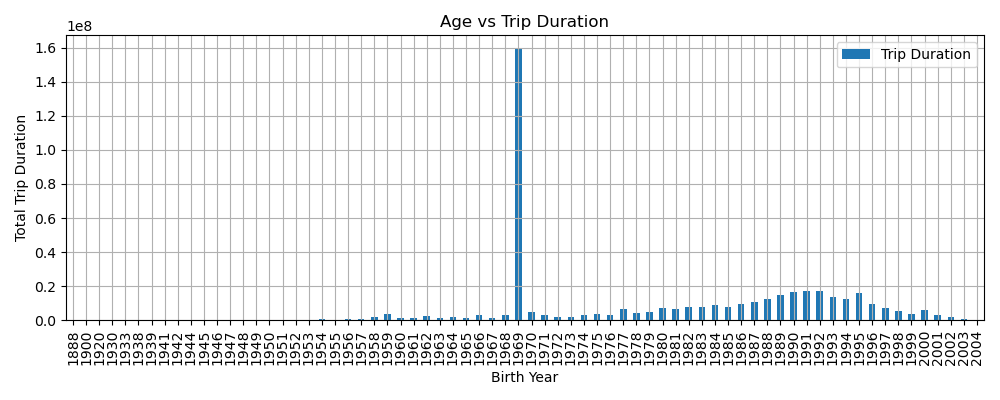

In [48]:
data_total.plot(kind ="bar", y= "Trip Duration", grid = True, figsize = (10, 4))
plt.xlabel("Birth Year")
plt.ylabel("Total Trip Duration")
plt.title("Age vs Trip Duration")
file = os.path.join("Images", "Age vs Trip Duration.png")
plt.savefig(file, bbox_inches = "tight")
plt.show()
plt.tight_layout()

In [49]:
data_total.plot(kind ="bar", y= "Gender", color = "g", alpha = 0.5, grid = True, figsize = (10, 4))
plt.xlabel("Birth Year")
plt.ylabel("Gender")
plt.title("Age vs Gender")
file = os.path.join("Images", "Age vs Gender.png")
plt.savefig(file, bbox_inches = "tight")
plt.show()
plt.tight_layout()

<IPython.core.display.Javascript object>

In [ ]:
g4 = sns.catplot(data = rider_count_data, x= "Age Group", hue = "Gender", kind = "count", 
                 palette = "Set2", height =3, aspect = 3)
file = os.path.join("Images", "Age Group")
g4.set_xticklabels(rotation=90)
plt.figure(figsize=(12,6))
plt.savefig(file, bbox_inches= "tight")  
#g4.set_ylim[ymin, ymax]
plt.show()
plt.tight_layout()

In [51]:
#bins <1900, 1900-1919, 1920-1939, 1940-1959, 1960-1979, 1980-1999, 200+, 
bins = [1888, 1889, 1919, 1939, 1959, 1979, 1999, 2004]
group_names = [ "<1900", "1900-1919", "1920-1939", "1940-1959", "1960-1979", "1980-1999", "2000+"]

rider_count_data["Age Group"] = pd.cut(rider_count_data["Birth Year"], bins, labels = group_names)
rider_count_data.head()

<ipython-input-51-83bac8cd946f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rider_count_data["Age Group"] = pd.cut(rider_count_data["Birth Year"], bins, labels = group_names)


,Birth Year,Gender,User Type,Trip Duration,Age Group
0,1984,2,Subscriber,226,1980-1999
1,1989,2,Subscriber,377,1980-1999
2,1989,1,Customer,288,1980-1999
3,1969,0,Customer,435,1960-1979
4,1983,2,Subscriber,231,1980-1999


<IPython.core.display.Javascript object>


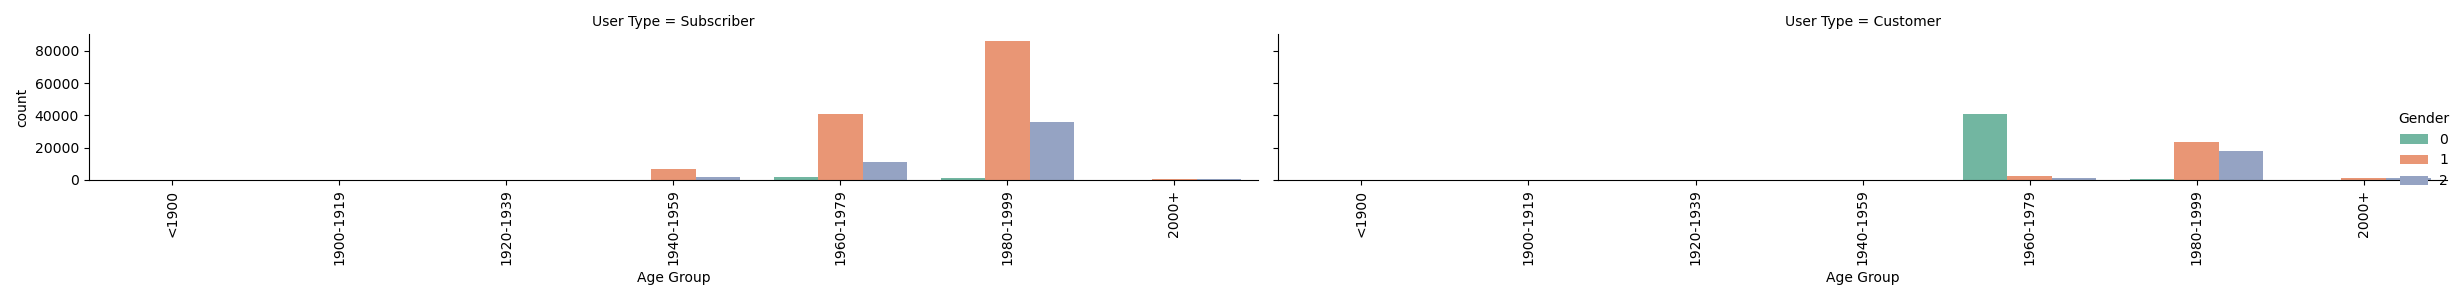

In [52]:
g2 = sns.catplot(data = rider_count_data, x= "Age Group", hue = "Gender", kind = "count", col = "User Type",
                 palette = "Set2", height =3, aspect = 4)
file = os.path.join("Images", "Age Group vs Trip Count")
g2.set_xticklabels(rotation=90)

plt.savefig(file, bbox_inches= "tight")  
plt.show()
plt.tight_layout()

<IPython.core.display.Javascript object>


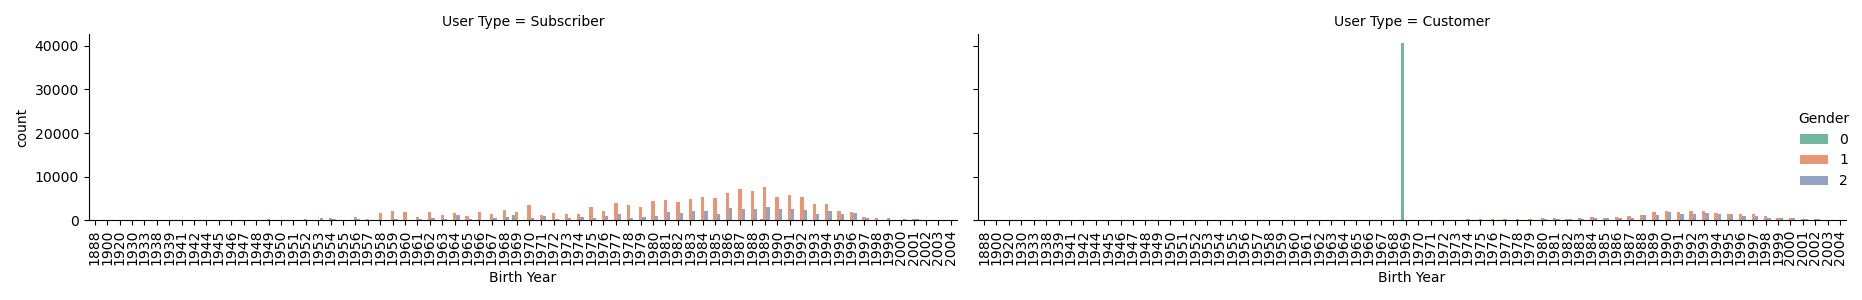

In [53]:
g = sns.catplot(data = rider_count_data, x= "Birth Year", hue = "Gender", kind = "count", col = "User Type",
                 palette = "Set2", height =3, aspect = 3)
file = os.path.join("Images", "Age vs Trip Number")
g.set_xticklabels(rotation=90)

plt.savefig(file, bbox_inches= "tight")  
plt.show()
plt.tight_layout()

<IPython.core.display.Javascript object>


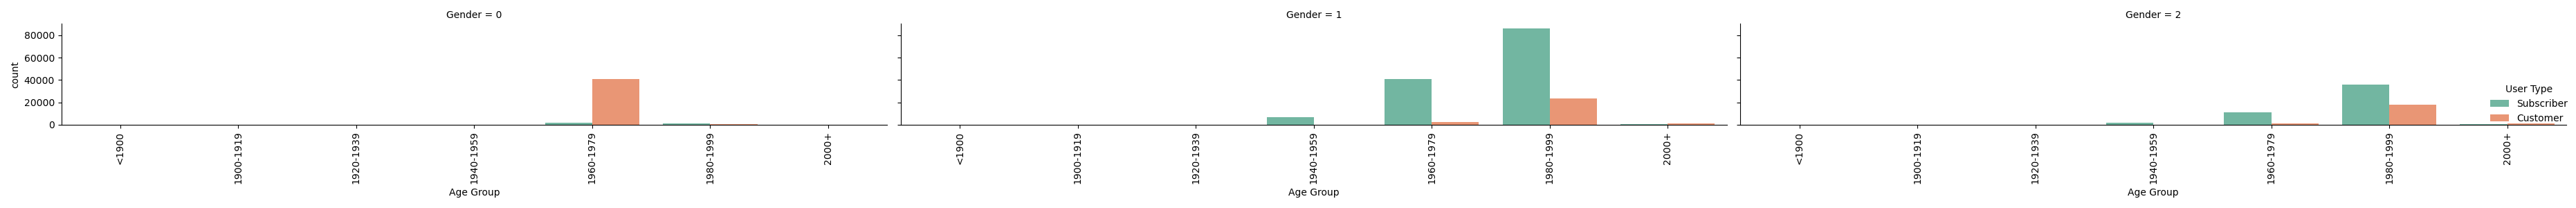

In [65]:
g3 = sns.catplot(data = rider_count_data, x= "Age Group", hue = "User Type", kind = "count", col = "Gender",
                 palette = "Set2", height =3, aspect = 4)
file = os.path.join("Images", "Age vs Gender")
g3.set_xticklabels(rotation=90)

plt.savefig(file, bbox_inches= "tight")  
plt.show()
plt.tight_layout()

In [66]:
rider_count_data

,Birth Year,Gender,User Type,Trip Duration,Age Group
0,1984,2,Subscriber,226,1980-1999
1,1989,2,Subscriber,377,1980-1999
2,1989,1,Customer,288,1980-1999
3,1969,0,Customer,435,1960-1979
4,1983,2,Subscriber,231,1980-1999
...,...,...,...,...,...
273742,1963,2,Subscriber,270,1960-1979
273743,1984,1,Subscriber,400,1980-1999
273744,1993,1,Subscriber,206,1980-1999
273745,1966,1,Subscriber,216,1960-1979


In [67]:
#check how 
sp =newyork_data.loc[newyork_data["Birth Year"] == 1969, :]
v_c= sp["Gender"].value_counts()
v_c_df = v_c.to_frame()
v_c_df

,Gender
0,41919
1,1850
2,182


In [68]:
num_gender = sp["Gender"].count()
num_gender

43951

In [69]:
v_c_df["Gender"].count()

3

In [70]:
t_duration = sp["Trip Duration"].count()
t_duration

43951

In [71]:
sp =newyork_data.loc[newyork_data["Birth Year"] == 1888, :]
v_c= sp["Gender"].value_counts()
v_c_df = v_c.to_frame()
v_c_df

,Gender
0,18


In [72]:
sp =newyork_data.loc[newyork_data["Birth Year"] == 1900, :]
v_c= sp["Gender"].value_counts()
v_c_df = v_c.to_frame()
v_c_df

,Gender
1,2


In [73]:
# # #calculate current age ????
# now = pd.to_datetime('today').normalize()
# #now = datetime.now()

now = pd.Timestamp.year()
rider_count_data["Age"] = now - rider_count_data["Birth Year"]
rider_count_data.head()

TypeError: 'getset_descriptor' object is not callable